# Cleaning and Analyzing Employee Surveys
by Nicholas Archambault

This project explores exit surveys from the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

We seek to determine whether resignations are typically motivated by some type of dissatisfaction, and whether disparities exist between the resignation circumstances of employees of varying ages and experience.

Prior to addressing these questions, we'll need to combine the two datasets and clean the accumulated data to render it fit for analysis.

## Introduction
We'll first read in the data from both surveys and do some initial exploration.

In [1]:
# Import packages and explore each dataset
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd

dete = pd.read_csv("dete_survey.csv")
tafe = pd.read_csv("tafe_survey.csv")

### DETE Information

In [2]:
dete.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
dete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [4]:
dete.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

The `dete` dataframe contains 822 entries and 56 variable columns.  Examination of its null values shows that the `Classification` and `Business Unit` columns contain significant missing data.  In the final columns pertaining to demographic information like race and disability status, most information is absent.  

### TAFE Information

In [5]:
tafe.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [6]:
tafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [7]:
tafe.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

The `tafe` dataframe contains 702 entries and 72 columns.  We observe that its columns have more cumulative null values than the columns of the `dete` dataframe.  A conspicuous number of them have exactly the same number of missing null entries.  There seem to be lots of values that are not stated, but not listed as `NaN`.

# Identifying Missing Values and Dropping Unnecessary Columns

Both datasets contain a number of columns that will not be necessary for our analysis.  Each contains many of the same columns under different names. We'll first correct all `Not Stated` values and drop columns not needed for analysis. 

In [8]:
dete = pd.read_csv("dete_survey.csv", na_values = "Not Stated") # Read in survey again, but `Not Stated` becomes NaN

In [9]:
# Drop columns from both datasets
dete = dete.drop(dete.columns[28:49], axis = 1)
tafe = tafe.drop(tafe.columns[17:66], axis = 1)

We must clean and standardize the column names for each dataset, since we will eventually want to combine them. The `dete` columns can be cleaned, and the names of the `tafe` columns can be changed to match.

In [10]:
dete.columns = dete.columns.str.lower().str.strip().str.replace("\s+", "_")
tafe = tafe.rename({'CESSATION YEAR':"cease_date", 
                    "Record ID":"id", 
                    "Reason for ceasing employment":"separationtype", 
                    "Gender. What is your Gender?":"gender", 
                    "CurrentAge. Current Age":"age", 
                    "Employment Type. Employment Type":"employment_status", 
                    "Classification. Classification":"position", 
                    "LengthofServiceOverall. Overall Length of Service at Institute (in years)":"institute_service", 
                    "LengthofServiceCurrent. Length of Service at current workplace (in years)":"role_service"}, 
                   axis = 1)

# Filter the Data

For this project, we'll only analyze survey respondents who resigned, so we'll only select separation types containing the string 'Resignation'.

In [11]:
dete["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [12]:
tafe["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [13]:
# Create new dataframe with only separations driven by resignations
dete_resignations = dete[dete["separationtype"].str.contains("Resignation")].copy()
tafe_resignations = tafe[tafe["separationtype"] == "Resignation"].copy()

## Verify the Data

Below, we clean and explore the `cease_date` and `dete_start_date` columns to make sure all of the years make sense. We'll use the following criteria:

   * Since the cease_date is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date.
   * Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

### DETE `cease_date`

In [14]:
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
07/2006      1
09/2010      1
2010         1
Name: cease_date, dtype: int64

In [15]:
# Extract years; convert to float in order to match `tafe` years
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.split("/").str[-1]
dete_resignations["cease_date"] = dete_resignations["cease_date"].astype(float)

In [16]:
dete_resignations["cease_date"].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

### DETE `dete_start_date`

In [17]:
dete_resignations["dete_start_date"].value_counts().sort_values(ascending = False)

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2006.0    13
2009.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1990.0     5
1993.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1976.0     2
1983.0     2
1974.0     2
1982.0     1
1973.0     1
1975.0     1
1987.0     1
1977.0     1
1984.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

### TAFE `cease_date`

In [18]:
tafe_resignations["cease_date"].value_counts().sort_values(ascending = False)

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

### Findings

The years in each dataset don't fully align. The `tafe_resignations` dataframe contains some cease dates in 2009, but the `dete_resignations` dataframe does not. The `tafe_resignations` dataframe also contains many more cease dates in 2010 than the `dete_resignations` dataframe. Since we aren't concerned with analyzing the results by year, we'll leave them as is.

# Create New Column
Since one of our goals is to analyze the association between employees' employment durations and the terms of their resignations, we need to create a new variable that displays the amount of time each employee spent in their position.

The `tafe_resignation` dataframe already contains an `institute_service` column with this information.

We can create the same column in the `dete_resignations` dataframe by subtracting the `dete_start_date` column from the `cease_date` column.

In [19]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]
dete_resignations["institute_service"].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

# Identify Dissatisfied Employees

Next, we'll identify any employees who resigned because they were dissatisfied. Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe:

   * tafe_resignations:
        * Contributing Factors. Dissatisfaction
        * Contributing Factors. Job Dissatisfaction
   * dete_resignations:
        * job_dissatisfaction
        * dissatisfaction_with_the_department
        * physical_work_environment
        * lack_of_recognition
        * lack_of_job_security
        * work_location
        * employment_conditions
        * work_life_balance
        * workload

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column. After our changes, the new dissatisfied column will contain just the following values:

   * True: indicates a person resigned because they were dissatisfied in some way
   * False: indicates a person resigned because of a reason other than dissatisfaction with the job
   * NaN: indicates the value is missing

We'll update the data so that the contributing factors columns are either True, False, or NaN.

In [20]:
def update_vals(row):
    # Return NaN for null rows
    if pd.isnull(row):
        return np.nan
    # Return False for unanswered rows, indicating satisfaction
    elif row == "-":
        return False
    else:
        return True

tafe_resignations["dissatisfied"] = tafe_resignations[["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]].applymap(update_vals).any(1, skipna = False)

dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)

# Create new dataframes containing the cleaned and updated data
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()

In [21]:
# Freqency tables of dissatisfaction for each dataset
tafe_resignations_up["dissatisfied"].value_counts(dropna = False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [22]:
dete_resignations_up["dissatisfied"].value_counts(dropna = False)

False    162
True     149
Name: dissatisfied, dtype: int64

# Combining the Data
We need to add an institute column to allow us to differentiate the data from each survey after they are combined.  Then, we'll combine the dataframes and drop remaining values we don't need.

In [23]:
# Add column identify where response came from
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

In [24]:
# Combine data
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True)

In [25]:
# Drop columns with less than 500 non-null values
combined_updated = combined.dropna(thresh = 500, axis = 1).copy()

# Clean the Service Column
Next, we'll clean the `institute_service` column and categorize employees according to the following definitions:

   * New: Less than 3 years in the workplace
   * Experienced: 3-6 years in the workplace
   * Established: 7-10 years in the workplace
   * Veteran: 11 or more years in the workplace

In [26]:
combined_updated["institute_service"].value_counts(dropna = False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
23.0                   4
11.0                   4
24.0                   4
19.0                   3
39.0                   3
32.0                   3
21.0                   3
36.0                   2
30.0                   2
28.0                   2
26.0                   2
25.0                   2


In [27]:
# Extract years; convert to float
combined_updated["institute_service"] = combined_updated["institute_service"].astype(str).str.extract(r"(\d+)")
combined_updated["institute_service"] = combined_updated["institute_service"].astype(float)

combined_updated["institute_service"].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

A simple function will convert the years to categories. We can apply this function to the `institute_service` column and create a new categorical variable.

In [28]:
# Classify each employee based on years of service
def transform(row):
    if row >= 11:
        return "Veteran"
    elif 10 >= row >= 7:
        return "Established"
    elif 6 >= row >= 3:
        return "Experienced"
    elif pd.isnull(row):
        return np.nan
    else:
        return "New"

# Create new column
combined_updated["service_cat"] = combined_updated["institute_service"].apply(transform)

In [29]:
# Frequency table
combined_updated["service_cat"].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

# Perform Initial Analysis
Finally, we can replace the missing values in the `dissatisfied` column with the most common value, `False`.  Then, we can calculate the percentages of `service_cat` column and plot the results.

In [30]:
combined_updated["dissatisfied"].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [31]:
# Replace missing values
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(False)

In [32]:
# Pivot table of results
combined_pv = combined_updated.pivot_table(index = "service_cat", values = "dissatisfied")
combined_pv

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


The above pivot table reveals the percentage of employees in each service category who resigned due to job dissatisfaction. We see that Veteran and Established employees, the two longer-tenured tiers, tended to resign over dissatisfaction at a greater rate.

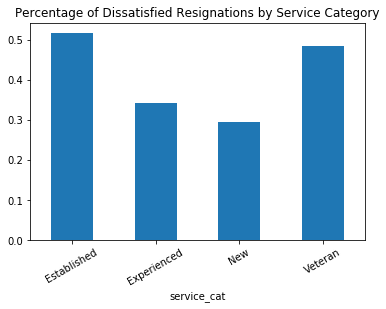

In [33]:
# Plot results
%matplotlib inline
combined_pv.plot(kind = "bar", rot = 30, legend = False, title = "Percentage of Dissatisfied Resignations by Service Category")

## Conclusion

This project extensively cleaned responses from two Australian employee surveys, then combined in order to assess whether resignations are typically motivated by job dissatisfaction.

From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. However, we need to handle the rest of the missing data to finalize our analysis.